# Project 3 - CNN & Pre-trained Model Comparison 
### Aleks Kamenev

Steps 
1. Imports 
2. Load in data 
3. As we are working with prepared data only some demo visualization is needed for project 
4. CNN custom model (either from project guide or inspired by the code provided their) 
5. Visualization and some graph for custom CNN 
6. Pre-trained model 
7. Visualization for pre-trained and graphs 
8. Def

### 1. Imports 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
# import pre-trained model
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.applications.vgg16 import VGG16

In [3]:
# for load model
from tensorflow.keras.models import load_model

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from tensorflow.keras.optimizers import RMSprop

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# Check for GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


# Def

In [8]:
# note to self move all the def functions here and organize if time allows if not yolo

In [9]:
def simple_plot_acc_model(model_history):
    acc = model_history.history['acc']
    val_acc = model_history.history['val_acc']
    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy - Inception Pretrained Model!')
    plt.legend(loc=0)
    plt.figure()


    plt.show()

In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(100,100))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="green" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
def get_params_num(model):
    no_train_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    train_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': no_train_params, 'trainable_params': train_params}

In [13]:
# code heavily inspired by a stackoverflow post
import os
import cv2
bad_list=[]
dir=r'data'
subdir_list=os.listdir(dir) # create a list of the sub directories in the directory ie train or test
for d in subdir_list:  # iterate through the sub directories train and test
    dpath=os.path.join (dir, d) # create path to sub directory
    if d in ['train', 'validation', 'test']:
        class_list=os.listdir(dpath) # list of classes ie dog or cat
       # print (class_list)
        for klass in class_list: # iterate through the two classes
            class_path=os.path.join(dpath, klass) # path to class directory
            #print(class_path)
            file_list=os.listdir(class_path) # create list of files in class directory
            for f in file_list: # iterate through the files
                fpath=os.path.join (class_path,f)
                index=f.rfind('.') # find index of period infilename
                ext=f[index+1:] # get the files extension
                if ext  not in ['jpg', 'png', 'bmp', 'gif']:
                    print(f'file {fpath}  has an invalid extension {ext}')
                    bad_list.append(fpath)                    
                else:
                    try:
                        img=cv2.imread(fpath)
                        size=img.shape
                    except:
                        print(f'file {fpath} is not a valid image file ')
                        bad_list.append(fpath)
                       
print (bad_list)

ModuleNotFoundError: No module named 'cv2'

### 2. Load in data 

In [14]:
# Pre Process as is in the guide

In [15]:
base_dir = r'C:\Spring_2022\Data_Science_Projects\Project_3\data'

In [16]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [17]:
print("train_dir path is : ", train_dir)
print(" ")
print("validation_dir path is : ", validation_dir)
print(" ")
print("validation_dir path is : ", test_dir)

train_dir path is :  C:\Spring_2022\Data_Science_Projects\Project_3\data\train
 
validation_dir path is :  C:\Spring_2022\Data_Science_Projects\Project_3\data\validation
 
validation_dir path is :  C:\Spring_2022\Data_Science_Projects\Project_3\data\test


In [18]:
train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures

In [19]:
print("train_cats_dir path is : ", train_cats_dir)
print(" ")
print("train_dogs_dir path is : ", train_dogs_dir)

train_cats_dir path is :  C:\Spring_2022\Data_Science_Projects\Project_3\data\train\cats
 
train_dogs_dir path is :  C:\Spring_2022\Data_Science_Projects\Project_3\data\train\dogs


In [20]:
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

In [21]:
print("validation_cats_dir path is : ", validation_cats_dir)
print(" ")
print("validation_dogs_dir path is : ", validation_dogs_dir)

validation_cats_dir path is :  C:\Spring_2022\Data_Science_Projects\Project_3\data\validation\cats
 
validation_dogs_dir path is :  C:\Spring_2022\Data_Science_Projects\Project_3\data\validation\dogs


In [22]:
test_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our test cat pictures
test_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our test dog pictures

In [23]:
print("test_cats_dir path is : ", test_cats_dir)
print(" ")
print("test_dogs_dir path is : ", test_dogs_dir)

test_cats_dir path is :  C:\Spring_2022\Data_Science_Projects\Project_3\data\validation\cats
 
test_dogs_dir path is :  C:\Spring_2022\Data_Science_Projects\Project_3\data\validation\dogs


In [24]:
train_cat_fnames = os.listdir(train_cats_dir)
train_cat_fnames

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '11.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg',
 '116.jpg',
 '117.jpg',
 '118.jpg',
 '119.jpg',
 '12.jpg',
 '120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '13.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '14.jpg',
 '141.jpg',
 '142.jpg',
 '143.jpg',
 '144.jpg',
 '145.jpg',
 '146.jpg',
 '147.jpg',
 '148.jpg',
 '149.jpg',
 '15.jpg',
 '150.jpg',
 '151.jpg',
 '152.jpg',
 '153.jpg',
 '154.jpg',
 '155.jpg',
 '156.jpg',
 '157.jpg',
 '158.jpg',
 '159.jpg',
 '16.jpg',
 '160.jpg',
 '161.jpg',
 '162.jpg',
 '163.jpg',
 '164.jpg',
 '165.jpg',
 '166.jpg',
 '167.jpg',
 '168.jpg',
 '169.jpg',
 '17.jpg',
 '170.jpg',
 '171.jpg',
 '172.jpg',
 '173.jpg',
 '174.jpg',
 '17

In [25]:
train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '11.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg',
 '116.jpg',
 '117.jpg',
 '118.jpg',
 '119.jpg',
 '12.jpg',
 '120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '13.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '14.jpg',
 '140.jpg',
 '141.jpg',
 '142.jpg',
 '143.jpg',
 '144.jpg',
 '145.jpg',
 '146.jpg',
 '147.jpg',
 '148.jpg',
 '149.jpg',
 '15.jpg',
 '150.jpg',
 '151.jpg',
 '152.jpg',
 '153.jpg',
 '154.jpg',
 '155.jpg',
 '156.jpg',
 '157.jpg',
 '158.jpg',
 '159.jpg',
 '16.jpg',
 '160.jpg',
 '161.jpg',
 '162.jpg',
 '163.jpg',
 '164.jpg',
 '165.jpg',
 '166.jpg',
 '167.jpg',
 '168.jpg',
 '169.jpg',
 '17.jpg',
 '170.jpg',
 '171.jpg',
 '172.jpg',
 '173.jpg',
 '17

In [26]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range=60,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  fill_mode="nearest")

In [27]:
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [28]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (224, 224))  

Found 2000 images belonging to 2 classes.


In [29]:
# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (224, 224))

Found 2000 images belonging to 2 classes.


In [30]:
# After some issues with Image and some extensive google searches 

In [31]:
# my preprocess

In [32]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input) \
    .flow_from_directory(directory=train_dir, target_size=(224,224),  class_mode = 'binary', batch_size=20)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input) \
    .flow_from_directory(directory=validation_dir, target_size=(224,224), class_mode = 'binary', batch_size=20)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input) \
    .flow_from_directory(directory=test_dir, target_size=(224,224), class_mode = 'binary', batch_size=20, shuffle=False)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [33]:
assert train_batches.n == 2000
assert valid_batches.n == 2000
assert test_batches.n == 300
assert test_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

### 3. As we are working with prepared data only some demo visualization is needed for project 

In [34]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

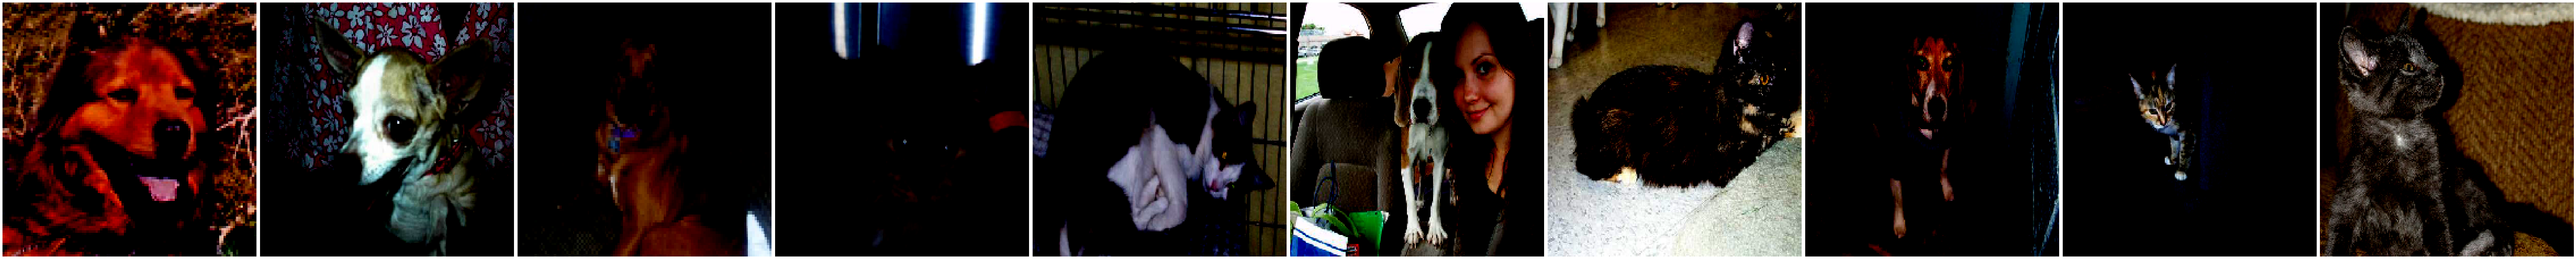

[1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.]


In [35]:
plotImages(imgs)
print(labels)

### 4. CNN custom model (either from project guide or inspired by the code provided their) 

In [36]:
# Model as provided

In [37]:
model_given_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding ='same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding ='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding ='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding ='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [38]:
model_given_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [39]:
model_given_cnn.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics = ['acc'])

In [ ]:
model_given_history = model_given_cnn.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing t

### 5. Visualization and some graph for custom CNN 

In [ ]:
# for model_given
# serious overfitting by 7,14 epoch

In [ ]:
simple_plot_acc_model(model_given_history)

### 5.1 Predict (for fun)

In [ ]:
test_images, test_labels = next(test_batches)
plotImages(test_images)
print(test_labels)

In [ ]:
test_batches.classes

In [ ]:
predictions = model_given.predict(x=test_batches, verbose=0)

In [ ]:
np.round(predictions)

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.round(predictions))

In [ ]:
test_batches.class_indices

In [ ]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### 6. Pre-trained model 

In [ ]:
# As per guide

In [ ]:
InceptionV3

Signature:
InceptionV3(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
)
Docstring:
Instantiates the Inception v3 architecture.

Reference:
- [Rethinking the Inception Architecture for Computer Vision](
    http://arxiv.org/abs/1512.00567) (CVPR 2016)

This function returns a Keras image classification model,
optionally loaded with weights pre-trained on ImageNet.

For image classification use cases, see
[this page for detailed examples](
  https://keras.io/api/applications/#usage-examples-for-image-classification-models).

For transfer learning use cases, make sure to read the
[guide to transfer learning & fine-tuning](
  https://keras.io/guides/transfer_learning/).

Note: each Keras Application expects a specific kind of input preprocessing.
For `InceptionV3`, call `tf.keras.applications.inception_v3.preprocess_input`
on your inputs before passing them to the model.
`inception_v3.preprocess_input` will scale input pixels between -1 and 1.

Args:
  include_top: Boolean, whether to include the fully-connected
    layer at the top, as the last layer of the network. Default to `True`.
  weights: One of `None` (random initialization),
    `imagenet` (pre-training on ImageNet),
    or the path to the weights file to be loaded. Default to `imagenet`.
  input_tensor: Optional Keras tensor (i.e. output of `layers.Input()`)
    to use as image input for the model. `input_tensor` is useful for sharing
    inputs between multiple different networks. Default to None.
  input_shape: Optional shape tuple, only to be specified
    if `include_top` is False (otherwise the input shape
    has to be `(299, 299, 3)` (with `channels_last` data format)
    or `(3, 299, 299)` (with `channels_first` data format).
    It should have exactly 3 inputs channels,
    and width and height should be no smaller than 75.
    E.g. `(150, 150, 3)` would be one valid value.
    `input_shape` will be ignored if the `input_tensor` is provided.
  pooling: Optional pooling mode for feature extraction
    when `include_top` is `False`.
    - `None` (default) means that the output of the model will be
        the 4D tensor output of the last convolutional block.
    - `avg` means that global average pooling
        will be applied to the output of the
        last convolutional block, and thus
        the output of the model will be a 2D tensor.
    - `max` means that global max pooling will be applied.
  classes: optional number of classes to classify images
    into, only to be specified if `include_top` is True, and
    if no `weights` argument is specified. Default to 1000.
  classifier_activation: A `str` or callable. The activation function to use
    on the "top" layer. Ignored unless `include_top=True`. Set
    `classifier_activation=None` to return the logits of the "top" layer.
    When loading pretrained weights, `classifier_activation` can only
    be `None` or `"softmax"`.

Returns:
  A `keras.Model` instance.
File:      c:\users\akame\anaconda3\envs\mydevenv\lib\site-packages\keras\applications\inception_v3.py
Type:      function

In [ ]:
pre_trained_model_inception_v3 = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False)

In [ ]:
pre_trained_model_inception_v3.load_weights('from-classes/inception_v3_weights.h5')

In [ ]:
pre_trained_model_inception_v3

In [ ]:
pre_trained_model_inception_v3.summary()

In [ ]:
pre_trained_model_inception_v3.get_weights()

In [ ]:
len(pre_trained_model_inception_v3.layers)

In [ ]:
last_layer = pre_trained_model_inception_v3.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

In [ ]:
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model(pre_trained_model_inception_v3.input, x) 

In [ ]:
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [ ]:
# It takes sometime for the 'fit' method to run...
# Do NOT run it often
#
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 40,
            validation_steps = 50,
            verbose = 2)

In [ ]:
# My test for InceptionV3

In [ ]:
pre_trained_model_inception_v3_take_2 = InceptionV3(input_shape = (224, 224, 3), 
                                include_top = False)

In [ ]:
pre_trained_model_inception_v3_take_2.load_weights('from-classes/inception_v3_weights.h5')

In [ ]:
pre_trained_model_inception_v3_take_2

In [ ]:
pre_trained_model_inception_v3_take_2.summary()

In [ ]:
last_layer = pre_trained_model_inception_v3_take_2.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

In [ ]:
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model_2 = Model(pre_trained_model_inception_v3_take_2.input, x) 

In [ ]:
model_2.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [ ]:
model_2_history = model_2.fit(
            train_batches,
            validation_data = valid_batches,
            steps_per_epoch = 50,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

In [ ]:
# take 3

In [ ]:
mode_inception_v3_take_3 = InceptionV3(input_shape = (224, 224, 3), 
                                include_top = False)

In [ ]:
mode_inception_v3_take_3.summary()

In [ ]:
mode_inception_v3_take_3.load_weights('from-classes/inception_v3_weights.h5')

In [ ]:
mode_inception_v3_take_3.summary()

In [ ]:
params_mode_inception_v3_take_3 = get_params_num(mode_inception_v3_take_3)
assert params_mode_inception_v3_take_3['non_trainable_params'] == 34432
assert params_mode_inception_v3_take_3['trainable_params'] == 21768352

In [ ]:
type(mode_inception_v3_take_3)

In [ ]:
for layer in mode_inception_v3_take_3.layers:
    layer.trainable = False

In [ ]:
mode_inception_v3_take_3.summary()

In [ ]:
last_layer = mode_inception_v3_take_3.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

In [ ]:
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model_3 = Model(mode_inception_v3_take_3.input, x) 

In [ ]:
# compile with Adam and with RMSprop
model_3.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [ ]:
# inceptrionv3 preprocess

In [ ]:
# Adam with 

In [ ]:
model_3_history = model_3.fit(
            train_batches,
            validation_data = valid_batches,
            steps_per_epoch = 50,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

In [ ]:
# RMSprop

In [ ]:
model_3_history_RMSprop = model_3.fit(
            train_batches,
            validation_data = valid_batches,
            steps_per_epoch = 50,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

In [ ]:
#take 4 VGG16

In [ ]:
mode_vgg_16_take_4 = VGG16()

In [ ]:
mode_vgg_16_take_4.summary()

In [ ]:
params_vgg_16_take_4 = get_params_num(mode_vgg_16_take_4)
assert params_vgg_16_take_4['non_trainable_params'] == 0
assert params_vgg_16_take_4['trainable_params'] == 138357544

In [ ]:
type(mode_vgg_16_take_4)

In [ ]:
mode_vgg_16_take_4_fine_tune = Sequential()
for layer in mode_vgg_16_take_4.layers[:-1]:
    mode_vgg_16_take_4_fine_tune.add(layer)

In [ ]:
mode_vgg_16_take_4_fine_tune.summary()

In [ ]:
type(mode_vgg_16_take_4_fine_tune)

In [ ]:
params_mode_vgg_16_take_4_fine_tune = get_params_num(mode_vgg_16_take_4_fine_tune)
assert params_mode_vgg_16_take_4_fine_tune['non_trainable_params'] == 0
assert params_mode_vgg_16_take_4_fine_tune['trainable_params'] == 134260544

In [ ]:
for layer in mode_vgg_16_take_4_fine_tune.layers:
    layer.trainable = False

In [ ]:
mode_vgg_16_take_4_fine_tune.add(Dense(units=1, activation='sigmoid'))

In [ ]:
mode_vgg_16_take_4_fine_tune.summary()

In [ ]:
params_mode_vgg_16_take_4_fine_tune = get_params_num(mode_vgg_16_take_4_fine_tune)
assert params_mode_vgg_16_take_4_fine_tune['non_trainable_params'] == 134260544
assert params_mode_vgg_16_take_4_fine_tune['trainable_params'] == 4097

In [ ]:
# Train VGG16

In [ ]:
mode_vgg_16_take_4_fine_tune.compile(optimizer = Adam(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [ ]:
mode_vgg_16_take_4_fine_tune_history = mode_vgg_16_take_4_fine_tune.fit(
            train_batches,
            validation_data = valid_batches,
            steps_per_epoch = 100,
            epochs = 30,
            validation_steps = 100,
            verbose = 2)

In [ ]:
# take 5 vgg16 as well but with vgg16 pre process

In [ ]:
mode_vgg_16_take_5_fine_tune_history = mode_vgg_16_take_4_fine_tune.fit(
            train_batches,
            validation_data = valid_batches,
            steps_per_epoch = 100,
            epochs = 10,
            validation_steps = 100,
            verbose = 2)

### 7. Visualization for pre-trained and graphs 


In [ ]:
# For pre_trained_model_inception_v3

In [ ]:
simple_plot_acc_model(history)

In [ ]:
# for take_2

In [ ]:
simple_plot_acc_model(model_2_history)

In [ ]:
# for take 3 inception_v3 Adam 

In [ ]:
simple_plot_acc_model(model_3_history)

In [ ]:
# for take 3 inception_v3 RMSprop 

In [ ]:
simple_plot_acc_model(model_3_history_RMSprop)

In [ ]:
# for take 4 with vgg16 but with dtapre proces for inception_v3

In [ ]:
simple_plot_acc_model(mode_vgg_16_take_4_fine_tune_history)

In [ ]:
# for take 5 with vgg16 but with dtapre proces for vgg16

In [ ]:
simple_plot_acc_model(mode_vgg_16_take_5_fine_tune_history)

In [ ]:
# for custom CNN

In [ ]:
simple_plot_acc_model(model_given_history)

### 8. Predict

In [ ]:
# use most successful models

In [ ]:
predictions_model_3 = model_3.predict(x=test_batches, verbose=0)

In [ ]:
test_batches.classes

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.round(predictions_model_3))

In [ ]:
test_batches.class_indices

In [ ]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
# Extra plot additional custom CNN exploration

In [ ]:
# for experimental (more complex) custom CNN

In [ ]:
simple_plot_acc_model(model_my_cnn_history)

In [ ]:
# for experimental (more complex - v2) custom CNN

In [ ]:
simple_plot_acc_model(model_my_cnn_last_adam_history)

In [ ]:
# for experimental (more complex - v3) custom CNN

In [ ]:
simple_plot_acc_model(model_my_cnn_last_RMSprop_history)

# Custom CNN Take 2

In [ ]:
# issues from try 1 overfitting 
# try Dropout
# and increase complexity

In [ ]:
model_my_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding ='same', input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding ='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding ='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding ='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(254, (3,3), activation='relu', padding ='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_my_cnn.summary()

In [ ]:
model_my_cnn.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics = ['acc'])

In [ ]:
model_my_cnn_history = model_my_cnn.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 40,
            validation_steps = 100,
            verbose = 2)

In [ ]:
model_my_cnn_history = model_my_cnn.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 40,
            validation_steps = 100,
            verbose = 2)

In [ ]:
model_my_cnn_history = model_my_cnn.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 80,
            validation_steps = 100,
            verbose = 2)

In [ ]:
model_my_cnn_history = model_my_cnn.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 80,
            validation_steps = 100,
            verbose = 2)

In [ ]:
model_my_cnn_history = model_my_cnn.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 10,
            validation_steps = 100,
            verbose = 2)

In [ ]:
# take 3 - add some complexity and expand
model_my_cnn_last = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding ='same', input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding ='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(254, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(254, (3,3), activation='relu', padding ='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_my_cnn_last.summary()

In [ ]:
# try Adam

In [ ]:
model_my_cnn_last.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics = ['acc'])

In [ ]:
model_my_cnn_last_adam_history = model_my_cnn_last.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 80,
            epochs = 20,
            validation_steps = 80,
            verbose = 2)

In [ ]:
model_my_cnn_last_adam_history = model_my_cnn_last.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 80,
            epochs = 20,
            validation_steps = 80,
            verbose = 2)

In [ ]:
model_my_cnn_last_adam_history = model_my_cnn_last.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 80,
            epochs = 20,
            validation_steps = 80,
            verbose = 2)

In [ ]:
# try RMSprop

In [ ]:
model_my_cnn_last.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics = ['acc'])

In [ ]:
model_my_cnn_last_RMSprop_history = model_my_cnn_last.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 80,
            validation_steps = 100,
            verbose = 2)

In [ ]:
model_my_cnn_last_RMSprop_history = model_my_cnn_last.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 80,
            validation_steps = 100,
            verbose = 2)

In [ ]:
model_my_cnn_last_RMSprop_history = model_my_cnn_last.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 30,
            validation_steps = 100,
            verbose = 2)